# Fischer LDA

It is done in 2 ways:

1. Using `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`
2. According to the book (manual calculation)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

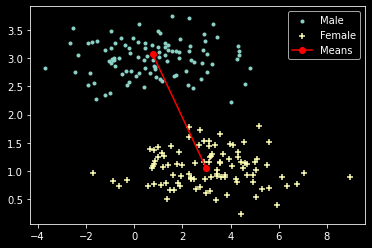

In [2]:
# Data
rng = np.random.default_rng()

nMale = 100
nFemale = 100
sample_size = nMale + nFemale

a = rng.multivariate_normal((1, 3), [[4.0, 0.01], [0.01, 0.1]], nMale)
b = rng.multivariate_normal((3, 1), [[4.0, 0.01], [0.01, 0.1]], nFemale)

_, ax = plt.subplots()
ax.scatter(a[:,0], a[:,1], marker='.', label='Male')
ax.scatter(b[:,0], b[:,1], marker='+', label='Female')
ax.plot(a.mean(axis=0), b.mean(axis=0), 'o-', color='red', label='Means')
ax.legend();

In [3]:
# FLDA 1. scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = np.concatenate((a, b), axis=0)
Y = np.concatenate((np.zeros(nMale), np.ones(nFemale)), axis=0)

xmin, ymin = X.min(axis=0) 
xmax, ymax = X.max(axis=0)
z = np.linspace(xmin, xmax, 100)

lda = LinearDiscriminantAnalysis()
lda.fit(X, Y)
lda.coef_

array([[  0.69899333, -19.23334642]])

In [4]:
# FLDA 2. Manual calculation
def flda_manual(a, b):
    # Mean of the two datasets
    mean1 = a.mean(axis=0)
    mean2 = b.mean(axis=0)

    # (unbiased) covariance matrices
    cov1 = np.cov(a, rowvar=False, bias=False)
    cov2 = np.cov(b, rowvar=False, bias=False)

    size1 = a.shape[0]
    size2 = b.shape[0]
    cov_tot = (cov1 * size1 + cov2 * size2) / (size1 + size2)

    # The vector w, which when X is projected onto it best separates the data by class. 
    # w = (mean1 - mean2) / cov_tot [Formula in topic 9.2.6.1 in the book]
    w = -np.linalg.pinv(cov_tot).dot(mean1 - mean2)
    return w

flda_manual(a, b)

array([  0.69899333, -19.23334642])

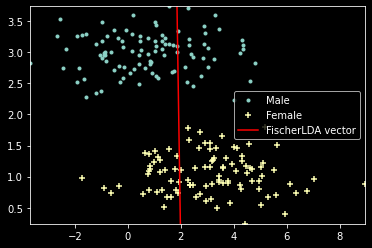

In [5]:
# plot_flda_vectors
vector = lda.coef_[0]
slope = vector[1] / vector[0]

mid_point = (a.mean(axis=0) + b.mean(axis=0)) / 2
c = mid_point[1] - slope * mid_point[0]

_, ax = plt.subplots()
ax.scatter(a[:,0], a[:,1], marker='.', label='Male')
ax.scatter(b[:,0], b[:,1], marker='+', label='Female')
ax.plot(z, slope * z + c, color='red', label='FischerLDA vector')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.legend();

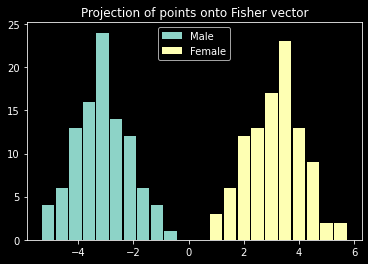

In [6]:
Xproj = lda.transform(X)

_, ax = plt.subplots()
ax.hist(Xproj[:nMale], rwidth=0.9, label='Male')
ax.hist(Xproj[nMale:], rwidth=0.9, label='Female')
ax.set_title('Projection of points onto Fisher vector')
ax.legend();

In [11]:
# PCA 1. scikit-learn
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X, Y)
pca.components_

array([[ 0.96159983, -0.27445539]])

In [12]:
# PCA 2. Manual calculation
def pca_manual(X, Y, n_components=1):
    # center columns by subtracting column means
    C = X - X.mean(axis=0)
    # eigendecomposition of covariance matrix
    _, vectors = np.linalg.eig(np.cov(C, rowvar=False, bias=False))
    
    return vectors[:,:n_components]

pca_manual(X, Y)

array([[ 0.96159983],
       [-0.27445539]])

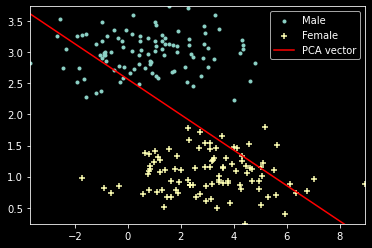

In [14]:
# plot_pca_vectors
vector = pca.components_[0]
slope = vector[1] / vector[0]

mid_point = (a.mean(axis=0) + b.mean(axis=0)) / 2
c = mid_point[1] - slope * mid_point[0]
z = np.linspace(xmin-1, xmax+1, 10)

_, ax = plt.subplots()
ax.scatter(a[:,0], a[:,1], marker='.', label='Male')
ax.scatter(b[:,0], b[:,1], marker='+', label='Female')
ax.plot(z, slope * z + c, color='red', label='PCA vector')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.legend();

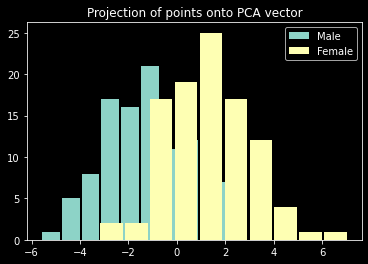

In [15]:
Xproj = pca.transform(X)

_, ax = plt.subplots()
ax.hist(Xproj[:nMale], rwidth=0.9, label='Male')
ax.hist(Xproj[nMale:], rwidth=0.9, label='Female')
ax.set_title('Projection of points onto PCA vector')
ax.legend();